# Introduction 

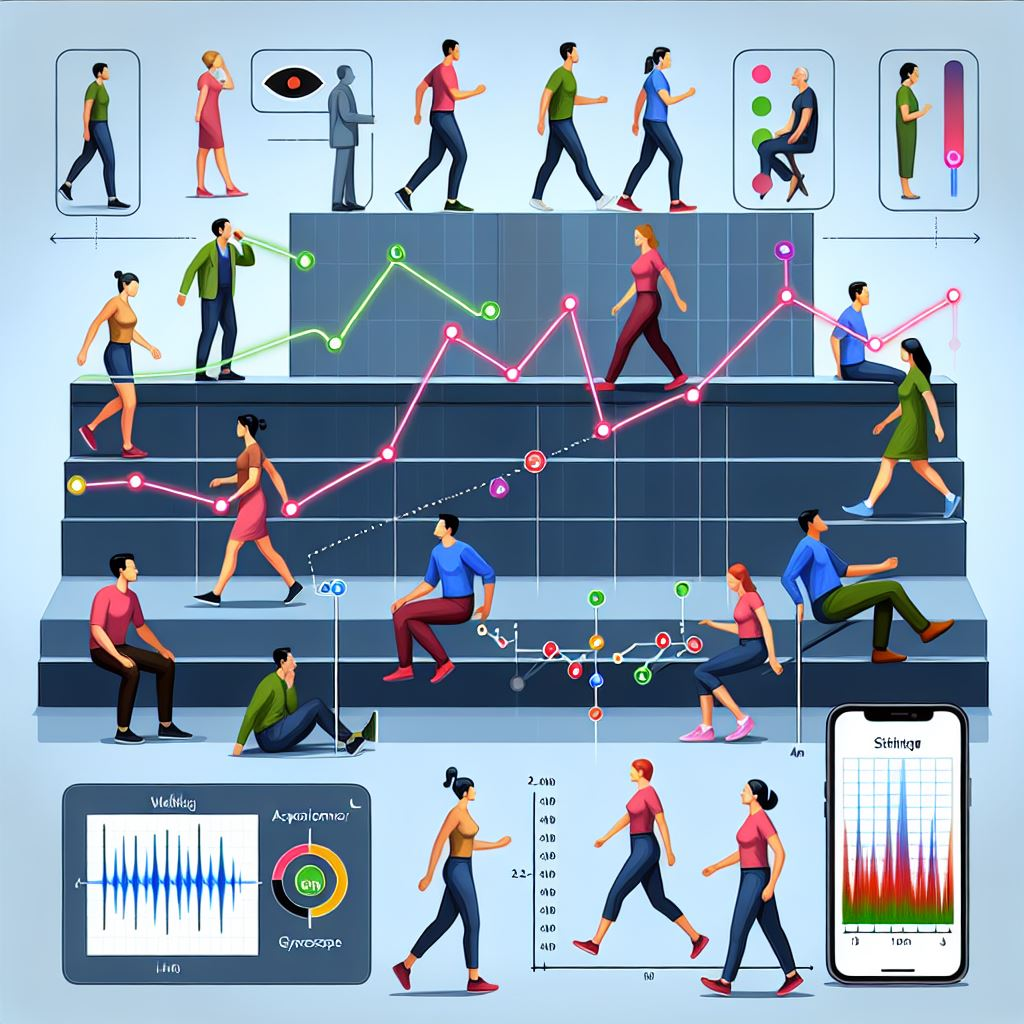

In [3]:
from IPython.display import Image, display
display(Image(filename='C:/Users/giftm/Downloads/Designer.jpeg')) 

This project focuses on human activity recognition (HAR) using data collected from smartphone sensors. The dataset used in this study was generated through a controlled experiment involving 30 volunteers aged between 19 and 48 years. Each participant was equipped with a Samsung Galaxy S II smartphone worn at the waist and performed six different activities: WALKING, WALKING UPSTAIRS, WALKING DOWNSTAIRS, SITTING, STANDING, and LAYING. The smartphone's embedded accelerometer and gyroscope captured 3-axial linear acceleration and angular velocity at a consistent rate of 50Hz during these activities. To ensure accurate labeling of activities, the experiments were video-recorded. The dataset was then randomly partitioned into training and test sets, with 70% of the participants contributing to the training data and 30% to the test data.

Sensor signals were pre-processed using noise filters and segmented into fixed-width sliding windows of 2.56 seconds, with a 50% overlap between windows. The signals were further processed by separating the acceleration into body and gravitational components using a Butterworth low-pass filter. This filtering step isolated the body motion and gravitational forces for detailed analysis.

For each window of sensor data, a 561-feature vector was extracted from both the time and frequency domains. These features, combined with activity labels, serve as the basis for building machine learning models to automatically recognize human activities based on sensor data.



In [87]:
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries for Data Handling and Computation
import numpy as np  # For numerical operations and array manipulations
import pandas as pd  # For data manipulation and analysis

# Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns  

# Statistical Libraries
from scipy import stats  

# Feature Engineering and Dimensionality Reduction
from sklearn.decomposition import PCA  # For Principal Component Analysis (PCA) to reduce dimensionality
from sklearn.manifold import TSNE  # For t-Distributed Stochastic Neighbor Embedding (t-SNE), another dimensionality reduction technique useful for visualization

# Model Selection and Hyperparameter Tuning
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # For hyperparameter tuning via exhaustive or randomized search

# Classification Algorithms
from sklearn.linear_model import LogisticRegression  # Logistic Regression for binary/multiclass classification
from sklearn.svm import SVC  # Support Vector Classifier (SVC) for binary/multiclass classification
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier for nonlinear problems
from sklearn.ensemble import RandomForestClassifier  # Random Forest, an ensemble learning method for classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Evaluation Metrics
from sklearn.metrics import confusion_matrix  # To generate a confusion matrix for model evaluation
from sklearn.metrics import accuracy_score  # To calculate the accuracy of models
from sklearn.metrics import classification_report  # For a detailed classification report including precision, recall, and F1-score

# Cross Validation and Performance Evaluation
from sklearn.model_selection import cross_val_score  # To perform cross-validation and evaluate model performance
from sklearn.metrics import roc_auc_score, roc_curve  # For ROC-AUC score and curve to evaluate binary classifiers
from sklearn.metrics import precision_score, recall_score, f1_score  # For precision, recall, and F1-score calculations


# Feature Scaling and Normalization
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import MinMaxScaler  # For scaling features to a given range, commonly [0, 1]

# Handling Imbalanced Datasets
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique for handling class imbalance
from imblearn.under_sampling import RandomUnderSampler  # For under-sampling the majority class in imbalanced datasets


# Loading the data

In [88]:
train = pd.read_csv('train2.csv')
test = pd.read_csv('test2.csv')

# Data Exploration

In [89]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [90]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [91]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [92]:
# Check for missing values in train and test datasets
def check_missing_values(train, test):
    # Checking missing values in the train dataset
    train_missing = train.isnull().sum().sum()
    print(f"Number of missing values in the train dataset: {train_missing}")
    
    # Checking missing values in the test dataset
    test_missing = test.isnull().sum().sum()
    print(f"Number of missing values in the test dataset: {test_missing}")

# Check for missing values in both datasets
check_missing_values(train, test)


Number of missing values in the train dataset: 0
Number of missing values in the test dataset: 0


The results show that there are no missing values in either the train or test datasets. This indicates that the data is complete, and there is no need for further handling or imputation of missing values before proceeding with the analysis or modeling process.

In [93]:
# Check for duplicates in train and test datasets
def check_duplicates(train, test):
    # Checking duplicates in the train dataset
    train_duplicates = train.duplicated().sum()
    print(f"Number of duplicate rows in the train dataset: {train_duplicates}")
    
    # Checking duplicates in the test dataset
    test_duplicates = test.duplicated().sum()
    print(f"Number of duplicate rows in the test dataset: {test_duplicates}")

# Check for duplicates in both datasets
check_duplicates(train, test)


Number of duplicate rows in the train dataset: 0
Number of duplicate rows in the test dataset: 0


The results show that there are no duplicate rows in either the train or test datasets. This indicates that the data is unique, and no further action is needed to remove or handle duplicate records

In [94]:
# Check data types and their counts in train and test datasets
def check_data_types(train, test):
    # Checking data types in the train dataset
    print("Data types and counts in the train dataset:")
    print(train.dtypes.value_counts())
    
    # Checking data types in the test dataset
    print("\nData types and counts in the test dataset:")
    print(test.dtypes.value_counts())

# Check data types and counts in both datasets
check_data_types(train, test)


Data types and counts in the train dataset:
float64    561
int64        1
object       1
Name: count, dtype: int64

Data types and counts in the test dataset:
float64    561
int64        1
object       1
Name: count, dtype: int64


Both the train and test datasets contain 561 features with data type float64, 1 feature with data type int64, and 1 feature with data type object.

In [95]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


# Data Visualisation

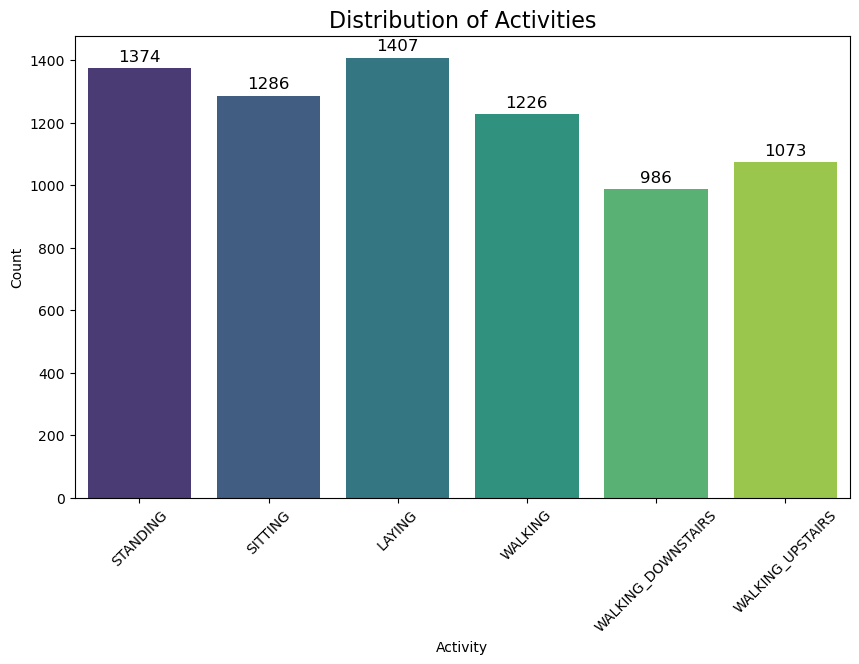

In [96]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Activity', data=train, palette='viridis')

# Adding counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Distribution of Activities', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


The bar plot illustrates the distribution of activities in the dataset, with LAYING being the most frequent activity (1,407 occurrences), followed by STANDING (1,374) and SITTING (1,286). WALKING appears 1,226 times, while WALKING_UPSTAIRS and WALKING_DOWNSTAIRS have fewer instances, at 1,073 and 986, respectively. The relatively balanced distribution suggests that most activities have a similar number of occurrences, though certain activities like LAYING are slightly more frequent.

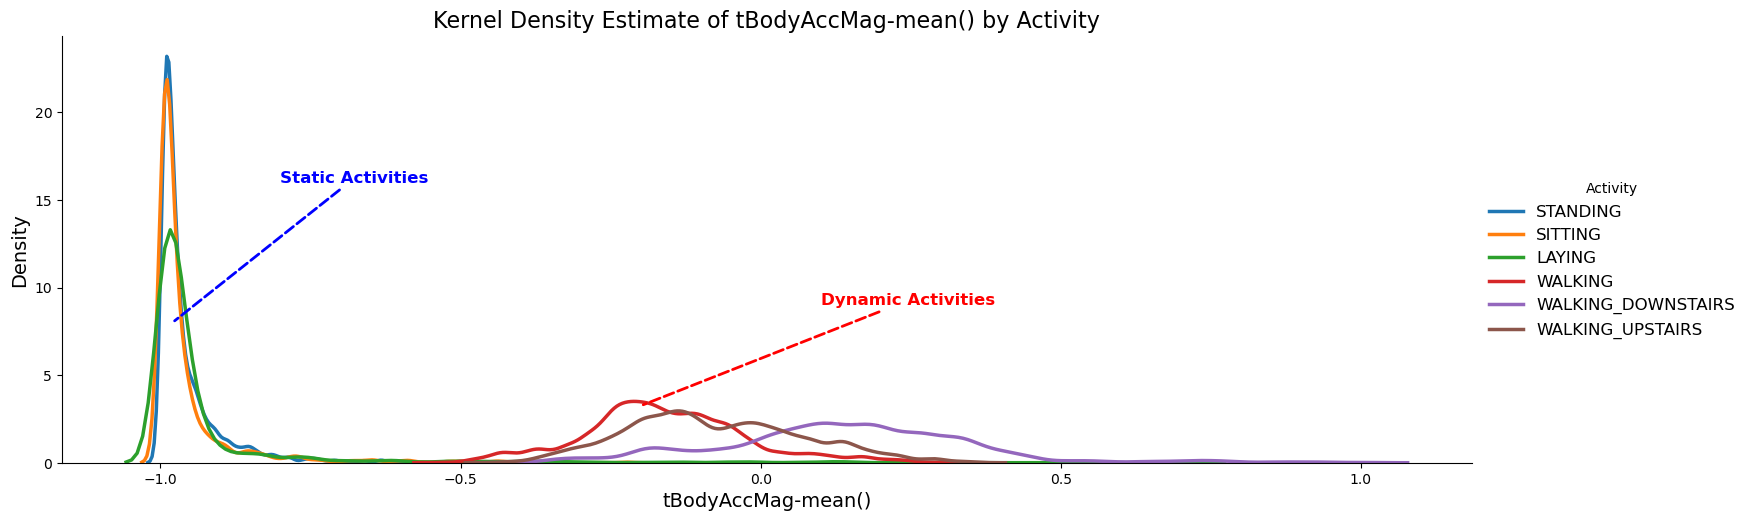

In [97]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5, aspect=3)
facetgrid.map(sns.kdeplot, 'tBodyAccMag-mean()', bw_adjust=0.5, common_norm=False, linewidth=2.5)

# Adding titles and labels
plt.title('Kernel Density Estimate of tBodyAccMag-mean() by Activity', fontsize=16)
plt.xlabel('tBodyAccMag-mean()', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Annotate static activities
plt.annotate("Static Activities", xy=(-0.98, 8), xytext=(-0.8, 16),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'color': 'blue', 'lw': 2}, 
             fontsize=12, color='blue', fontweight='bold')

# Annotate dynamic activities
plt.annotate("Dynamic Activities", xy=(-0.2, 3.25), xytext=(0.1, 9),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed', 'color': 'red', 'lw': 2}, 
             fontsize=12, color='red', fontweight='bold')

# Customize legend
facetgrid.add_legend(title='Activity', fontsize=12)
for text in facetgrid._legend.texts:
    text.set_color('black')
plt.show()


The kernel density estimate (KDE) plot shows the distribution of the tBodyAccMag-mean() feature for different activities. The blue dashed annotation marks "Static Activities" (such as STANDING, SITTING, and LAYING), which are concentrated around lower values near -1. These activities have sharper, taller peaks indicating more consistency in their tBodyAccMag-mean() values. On the other hand, the red dashed annotation highlights "Dynamic Activities" (such as WALKING, WALKING_DOWNSTAIRS, and WALKING_UPSTAIRS), which show a wider spread with lower densities around higher tBodyAccMag-mean() values. This suggests that dynamic activities exhibit more variation in this feature compared to static ones.

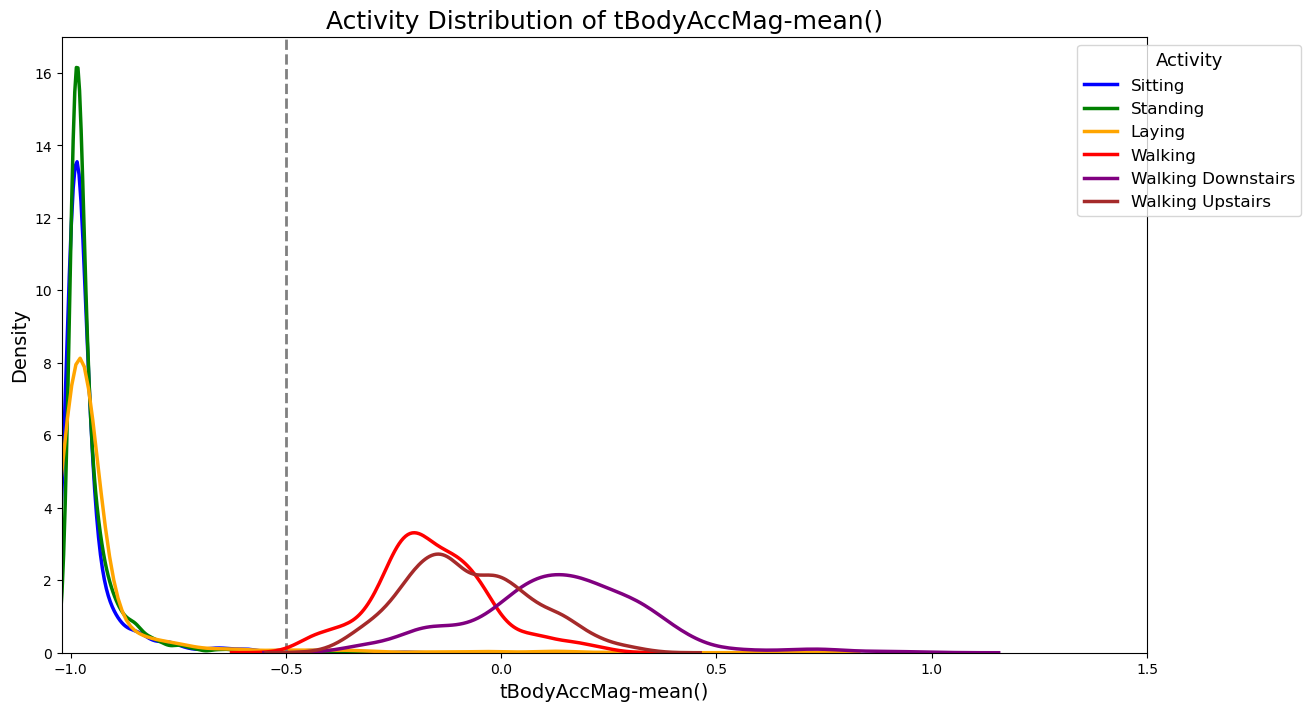

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall figure size
plt.figure(figsize=(14, 8))

# Create the density plots for static activities
plt.title("Activity Distribution of tBodyAccMag-mean()", fontsize=18)
sns.kdeplot(train[train["Activity"] == "SITTING"]['tBodyAccMag-mean()'], label='Sitting', linewidth=2.5, color='blue')
sns.kdeplot(train[train["Activity"] == "STANDING"]['tBodyAccMag-mean()'], label='Standing', linewidth=2.5, color='green')
sns.kdeplot(train[train["Activity"] == "LAYING"]['tBodyAccMag-mean()'], label='Laying', linewidth=2.5, color='orange')

# Set limits and labels for the static activities
plt.xlim([-1.02, -0.5])
plt.ylim([0, 17])
plt.xlabel('tBodyAccMag-mean()', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a vertical line to separate static and dynamic activities
plt.axvline(x=-0.5, color='grey', linestyle='--', linewidth=2)

# Create the density plots for dynamic activities
sns.kdeplot(train[train["Activity"] == "WALKING"]['tBodyAccMag-mean()'], label='Walking', linewidth=2.5, color='red')
sns.kdeplot(train[train["Activity"] == "WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'], label='Walking Downstairs', linewidth=2.5, color='purple')
sns.kdeplot(train[train["Activity"] == "WALKING_UPSTAIRS"]['tBodyAccMag-mean()'], label='Walking Upstairs', linewidth=2.5, color='brown')

# Set the limits for dynamic activities
plt.xlim([-1.02, 1.5])
plt.ylim([0, 17])

# Adjust legend
plt.legend(title='Activity', fontsize=12, title_fontsize='13', loc='upper right', bbox_to_anchor=(1.15, 1))

# Show the plot
plt.show()


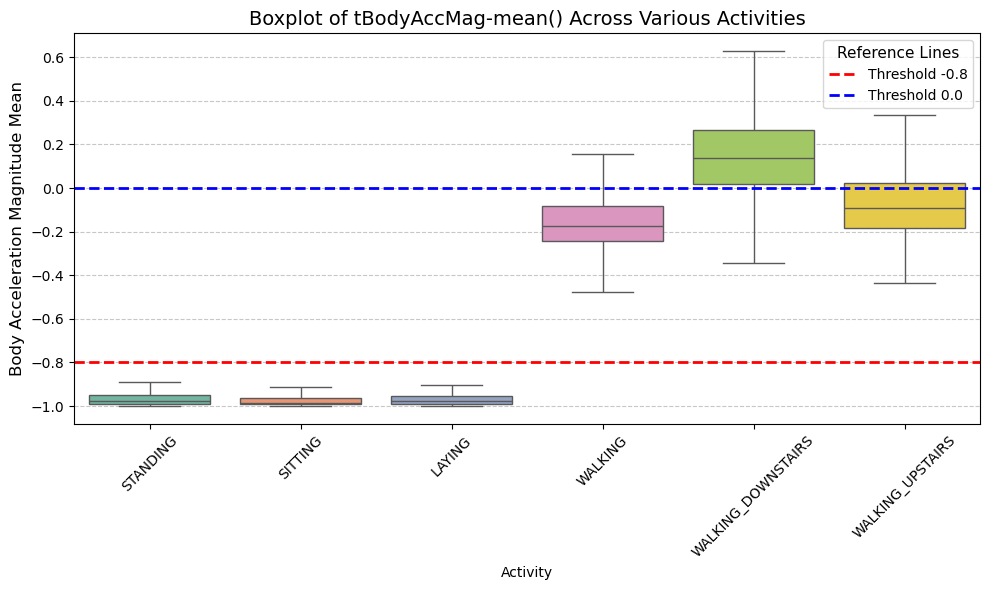

In [99]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="Activity", y="tBodyAccMag-mean()", data=train, showfliers=False, palette="Set2")

plt.ylabel('Body Acceleration Magnitude Mean', fontsize=12)
plt.title("Boxplot of tBodyAccMag-mean() Across Various Activities", fontsize=14)
plt.axhline(y=-0.8, color='red', linestyle='--', linewidth=2, label='Threshold -0.8')
plt.axhline(y=0.0, color='blue', linestyle='--', linewidth=2, label='Threshold 0.0')
plt.legend(title='Reference Lines', fontsize=10, title_fontsize='11')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


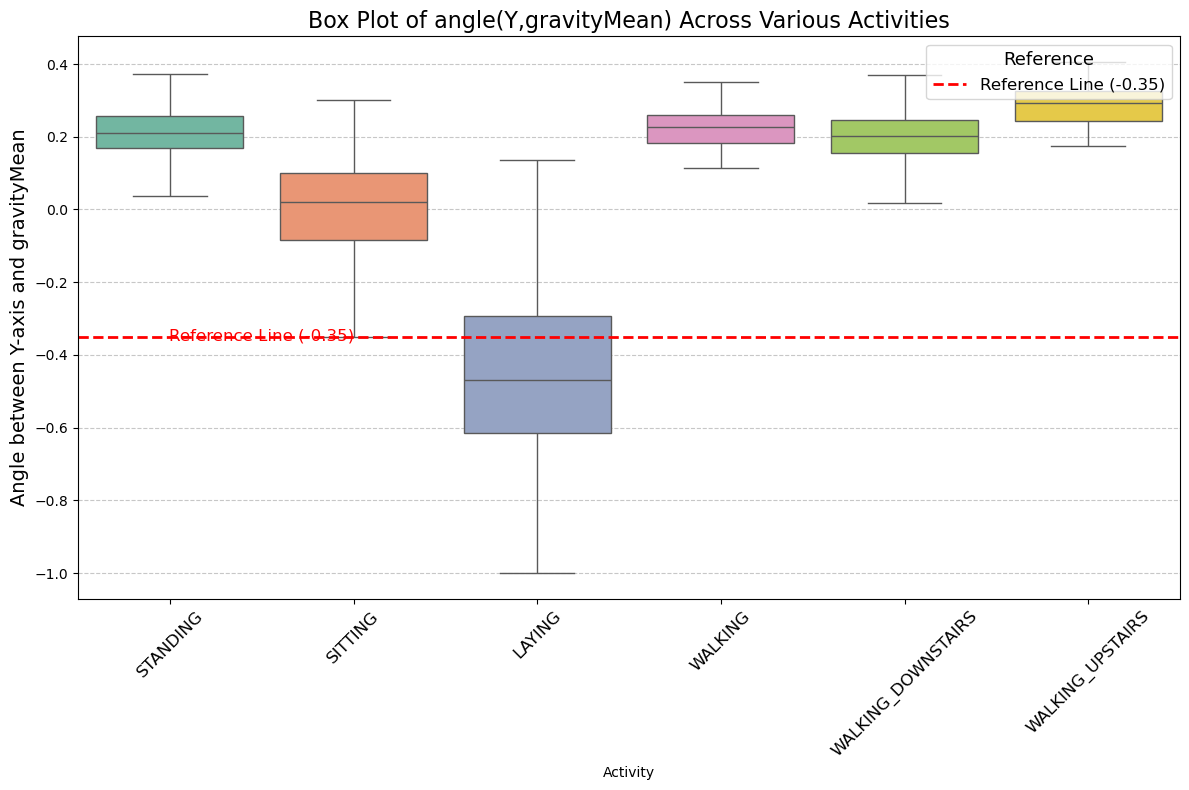

In [100]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=train, showfliers=False, palette='Set2')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel("Angle between Y-axis and gravityMean", fontsize=14)
plt.title('Box Plot of angle(Y,gravityMean) Across Various Activities', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.axhline(y=-0.35, color='red', linestyle='--', linewidth=2, label='Reference Line (-0.35)')
plt.text(x=0.5, y=-0.36, s='Reference Line (-0.35)', color='red', ha='center', fontsize=12)
plt.legend(title='Reference', fontsize=12, title_fontsize='13', loc='upper right')
plt.tight_layout() 
plt.show()


The box plot visualizes the distribution of the angle between the Y-axis and gravity mean across different activities. Each activity's distribution is shown without outliers for clarity. The red dashed horizontal line at -0.35 serves as a reference, helping to differentiate the angle values between activities. The plot highlights that static activities like STANDING and SITTING generally have higher angle values, while LAYING has a notably lower median angle. The dynamic activities, such as WALKING and its variants, show a tighter distribution, indicating more consistent angle values across those actions.

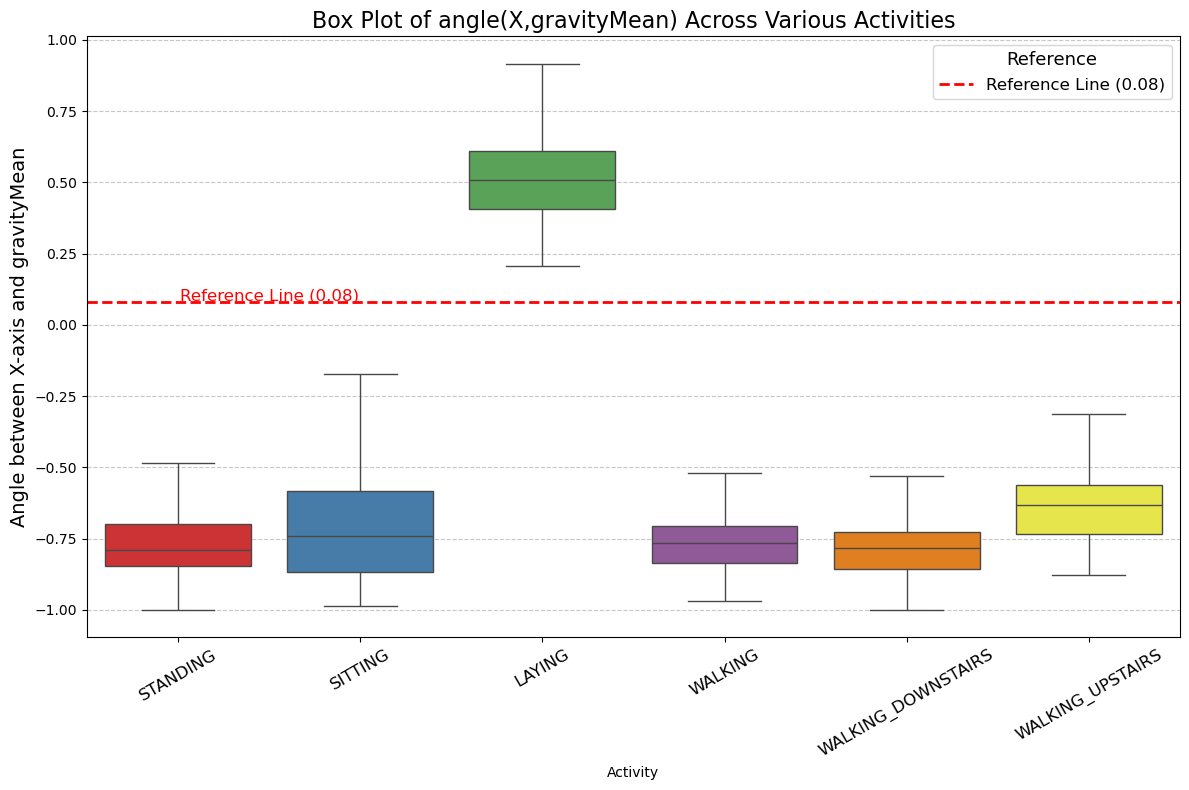

In [101]:
plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False, palette='Set1')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the labels and title
plt.ylabel("Angle between X-axis and gravityMean", fontsize=14)
plt.title('Box Plot of angle(X,gravityMean) Across Various Activities', fontsize=16)

# Rotate the x-tick labels for better visibility
plt.xticks(rotation=30, fontsize=12)

# Draw a horizontal reference line
plt.axhline(y=0.08, color='red', linestyle='--', linewidth=2, label='Reference Line (0.08)')
plt.text(x=0.5, y=0.085, s='Reference Line (0.08)', color='red', ha='center', fontsize=12)

# Adjust legend
plt.legend(title='Reference', fontsize=12, title_fontsize='13', loc='upper right')

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


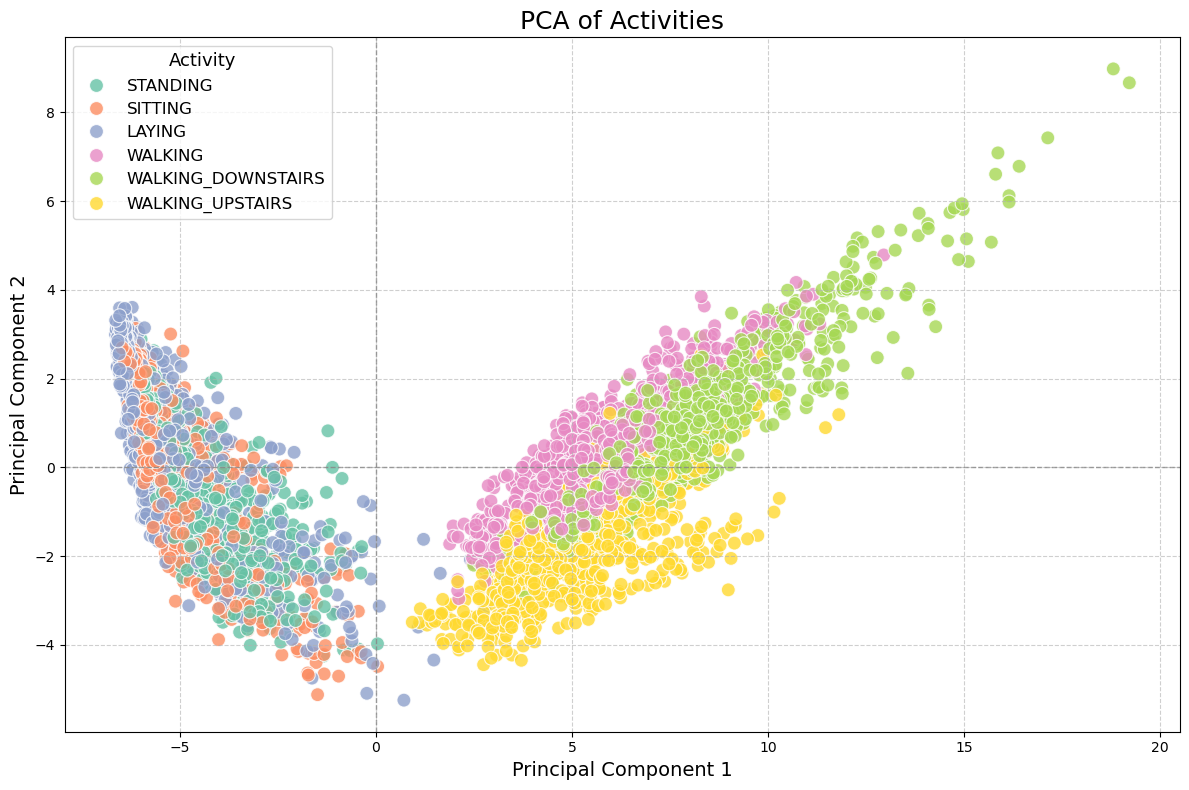

In [102]:
from sklearn.decomposition import PCA
# Prepare data for PCA by dropping the subject and Activity columns
x_for_pca = train.drop(['subject', 'Activity'], axis=1)

# Perform PCA
pca = PCA(n_components=2, random_state=0)
pca_result = pca.fit_transform(x_for_pca)

# Create a DataFrame with PCA results and activity labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Activity'] = train['Activity'].values  # Adding the Activity column for coloring

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot of PCA results
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Activity', palette='Set2', s=100, alpha=0.8)

# Set the title and labels
plt.title('PCA of Activities', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Enhance the visual with grid and legend
plt.axhline(0, color='grey', linestyle='--', linewidth=1, alpha=0.7)
plt.axvline(0, color='grey', linestyle='--', linewidth=1, alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.6)

# Show legend with title
plt.legend(title='Activity', fontsize=12, title_fontsize='13')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


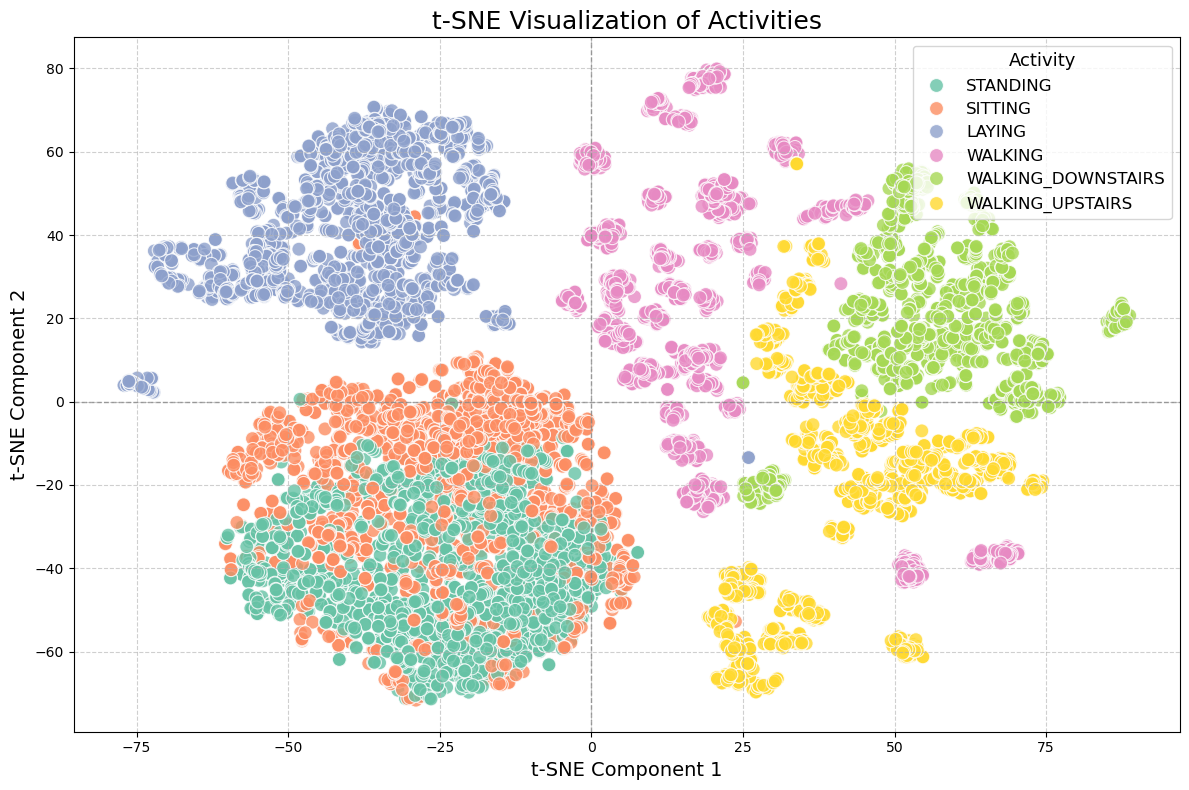

In [103]:
from sklearn.manifold import TSNE
x_for_tsne = train.drop(['subject', 'Activity'], axis=1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000)
tsne_result = tsne.fit_transform(x_for_tsne)

tsne_df = pd.DataFrame(data=tsne_result, columns=['tSNE1', 'tSNE2'])
tsne_df['Activity'] = train['Activity'].values  # Adding the Activity column for coloring

# Set the figure size
plt.figure(figsize=(12, 8))

sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='Activity', palette='Set2', s=100, alpha=0.8)

plt.title('t-SNE Visualization of Activities', fontsize=18)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.axhline(0, color='grey', linestyle='--', linewidth=1, alpha=0.7)
plt.axvline(0, color='grey', linestyle='--', linewidth=1, alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Activity', fontsize=12, title_fontsize='13')
plt.tight_layout()
plt.show()


# Model Training 

In [104]:
X = train.drop(['subject', 'Activity'], axis=1)  # Features
y = train['Activity']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Training data size:', X_train.shape)
print('Testing data size:', X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Scaled training data size:', X_train_scaled.shape)
print('Scaled testing data size:', X_test_scaled.shape)


Training data size: (5881, 561)
Testing data size: (1471, 561)
Scaled training data size: (5881, 561)
Scaled testing data size: (1471, 561)


We are preparing a dataset for machine learning by separating the features (X) from the target labels (y), then splitting the data into training (80%) and testing (20%) sets while preserving class distribution. After confirming the sizes of the training and testing datasets, we scale the features using StandardScaler to standardize the data, ensuring consistent mean and variance. Finally, we verify the dimensions of the scaled datasets, which remain unchanged, indicating readiness for modeling.

In [105]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.96      0.96      0.96       257
          STANDING       0.96      0.96      0.96       275
           WALKING       1.00      1.00      1.00       245
WALKING_DOWNSTAIRS       1.00      1.00      1.00       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471

Decision Tree Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.91      0.90      0.91       257
          STANDING       0.91      0.92      0.91       275
           WALKING       0.94      0.96      0.95       245
WALKING_DOWNSTAI

We are training and evaluating several machine learning models, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine, using a dataset of activity labels. Each model is fit to the scaled training data, and predictions are made on the scaled test data. The classification reports for each model show key performance metrics such as precision, recall, and F1-score for each activity class, along with overall accuracy. Logistic Regression and Random Forest achieve very high accuracy (0.99), demonstrating excellent performance across all classes. The Decision Tree has slightly lower accuracy (0.94) but still performs well, while the Support Vector Machine achieves an accuracy of 0.98. These results provide insights into the effectiveness of each model in classifying the activity types, with most models showing strong performance overall.

# Predictions 

In [136]:
sample_indices = np.random.choice(X_test.index, size=10, replace=False)
sample_data = X_test.loc[sample_indices]
sample_labels = y_test.loc[sample_indices]

sample_data_scaled = scaler.transform(sample_data)
predictions_df = pd.DataFrame(index=sample_indices, columns=['True Label'])
predictions_df['True Label'] = sample_labels.values

for model_name, model in models.items():
    predictions_df[model_name] = model.predict(scaler.transform(sample_data))

print(predictions_df)


              True Label Logistic Regression       Decision Tree  \
2370    WALKING_UPSTAIRS    WALKING_UPSTAIRS    WALKING_UPSTAIRS   
4619              LAYING              LAYING              LAYING   
2589             SITTING             SITTING             SITTING   
7320  WALKING_DOWNSTAIRS  WALKING_DOWNSTAIRS  WALKING_DOWNSTAIRS   
1177            STANDING            STANDING            STANDING   
3041    WALKING_UPSTAIRS    WALKING_UPSTAIRS    WALKING_UPSTAIRS   
2951              LAYING              LAYING              LAYING   
263              WALKING             WALKING             WALKING   
2437             SITTING             SITTING             SITTING   
479   WALKING_DOWNSTAIRS  WALKING_DOWNSTAIRS             WALKING   

           Random Forest Support Vector Machine  
2370    WALKING_UPSTAIRS       WALKING_UPSTAIRS  
4619              LAYING                 LAYING  
2589             SITTING                SITTING  
7320  WALKING_DOWNSTAIRS     WALKING_DOWNSTAIRS  
1

We are randomly selecting a sample of 10 indices from the test set to examine how well different machine learning models predict activity labels. After scaling the sample data, we create a DataFrame to store the true labels alongside predictions from each model: Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine. Each model's predictions are added to the DataFrame, which allows for easy comparison of the true labels against the predicted ones. The resulting table shows that all models generally predict the activities correctly, with only a minor discrepancy for the Random Forest model, indicating its performance aligns closely with the other models on this sample. This demonstrates the effectiveness of the trained models in classifying the activity types based on the provided features.

# References

1. Anguita, D., Ghio, A., Oneto, L., Parra, X., & Reyes-Ortiz, J. L. (2013). A public domain dataset for human activity recognition using smartphones. *2013 21st European Signal Processing Conference (EUSIPCO)*, 1-5.

2. Qiu, S., Zhang, Y., & Wang, Z. (2016). Human Activity Recognition Based on Time-Series Data with Sliding Windows. *Journal of Sensors*, 2016, Article ID 2320305.

3. Zhang, X., Yang, H., & Wang, Z. (2015). A survey on feature extraction methods for human activity recognition. *International Journal of Signal Processing, Image Processing and Pattern Recognition*, 8(3), 127-136.

4. Krawczyk, B. (2016). Learning from Imbalanced Data: Open Challenges and Future Directions. *Progress in Artificial Intelligence*, 5(4), 221-232.

5. Reyes-Ortiz, J. L., Parra, X., & Oneto, L. (2016). Human Activity Recognition Using Smartphones. *UCI Machine Learning Repository*.


# --- END ---